Example of pulling photon counts from trees

In [10]:
#importing the required libraries 
import ROOT as r
import os, os.path

For documentation on data files, see https://github.com/UVa-Calvision/singlebar2

In [11]:
dataDir='/project/HEP_EF/calvision/singlebar2'
!ls {dataDir}
#!ls {dataDir}/*gap/*root

air_gap  og_gap  si_gap


In [12]:
E=['300MeV','1GeV','3GeV','10GeV','30GeV']
eGeV={'300MeV':0.3,'1GeV':1,'3GeV':3,'10GeV':10,'30GeV':30}
particles=['pi','mu','el']

In [13]:
for p in particles:
    for e in E:
        file=f'{dataDir}/{p}_{e}.root'
        print(file)

/project/HEP_EF/calvision/singlebar2/pi_300MeV.root
/project/HEP_EF/calvision/singlebar2/pi_1GeV.root
/project/HEP_EF/calvision/singlebar2/pi_3GeV.root
/project/HEP_EF/calvision/singlebar2/pi_10GeV.root
/project/HEP_EF/calvision/singlebar2/pi_30GeV.root
/project/HEP_EF/calvision/singlebar2/mu_300MeV.root
/project/HEP_EF/calvision/singlebar2/mu_1GeV.root
/project/HEP_EF/calvision/singlebar2/mu_3GeV.root
/project/HEP_EF/calvision/singlebar2/mu_10GeV.root
/project/HEP_EF/calvision/singlebar2/mu_30GeV.root
/project/HEP_EF/calvision/singlebar2/el_300MeV.root
/project/HEP_EF/calvision/singlebar2/el_1GeV.root
/project/HEP_EF/calvision/singlebar2/el_3GeV.root
/project/HEP_EF/calvision/singlebar2/el_10GeV.root
/project/HEP_EF/calvision/singlebar2/el_30GeV.root


Classes used
- [TFile](https://root.cern.ch/doc/master/classTFile.html)
- [TTree](https://root.cern.ch/doc/master/classTTree.html)

In [14]:
# list elements in a file and variables in the tree
file=f'{dataDir}/air_gap/el_10GeV.root'
tf=r.TFile(file)
tf.ls()
tf.Get('tree').Print()

TFile**		/project/HEP_EF/calvision/singlebar2/air_gap/el_10GeV.root	
 TFile*		/project/HEP_EF/calvision/singlebar2/air_gap/el_10GeV.root	
  KEY: TTree	tree;1	tree
  KEY: TH1F	h_phot_lambda_ECAL_f_produce_Ceren;1	
  KEY: TH1F	h_phot_lambda_ECAL_f_produce_Scin;1	
  KEY: TH1F	h_phot_lambda_ECAL_r_produce_Ceren;1	
  KEY: TH1F	h_phot_lambda_ECAL_r_produce_Scin;1	
  KEY: TH1F	h_phot_time_ECAL_f_produce_Ceren;1	
  KEY: TH1F	h_phot_time_ECAL_f_produce_Scin;1	
  KEY: TH1F	h_phot_time_ECAL_r_produce_Ceren;1	
  KEY: TH1F	h_phot_time_ECAL_r_produce_Scin;1	
  KEY: TH1F	h_phot_time_SiPMF_Ceren;1	
  KEY: TH1F	h_phot_time_SiPMF_Scin;1	
  KEY: TH1F	h_phot_time_SiPMC_Ceren;1	
  KEY: TH1F	h_phot_time_SiPMC_Scin;1	
  KEY: TH1F	h_phot_time_SiPMS_Ceren;1	
  KEY: TH1F	h_phot_time_SiPMS_Scin;1	
  KEY: TH1F	h_phot_lambda_SiPMF_f_Ceren;1	
  KEY: TH1F	h_phot_lambda_SiPMF_f_Scin;1	
  KEY: TH1F	h_phot_lambda_SiPMC_r_Ceren;1	
  KEY: TH1F	h_phot_lambda_SiPMC_r_Scin;1	
  KEY: TH1F	h_phot_lambda_SiPMS_r_Ceren;1	
  KEY

In [15]:
def getAverage(filename, branchname):
    f3 = r.TFile.Open(filename)
    t=f3.Get('tree')
    histname = 'hist3_%s_%s' % (os.path.basename(filename), branchname)
    x=r.TH1F(histname, 'title' , 100 , 0, 0)
    t.Draw('%s>>%s' % (branchname, histname), '', 'goff')
    return x.GetMean()    

Classes used
- [TGraph](https://root.cern.ch/doc/master/classTGraph.html)
- [TMultiGraph](https://root.cern.ch/doc/master/classTMultiGraph.html)

In [16]:
# loop over a set of files/trees and calculate the average value some variable
tgs=[]  # tgraphs
tm = r.TMultiGraph()
tg=r.TGraph()
tg.SetTitle('Muon: SDCdetected_r_C;GeV;N')
for e in E:
    file=f'{dataDir}/air_gap/mu_{e}.root'
    #print(file,eGeV[e])
    mean=getAverage(file,'SDCdetected_r_C')
    tg.SetPoint(tg.GetN(),eGeV[e],mean)

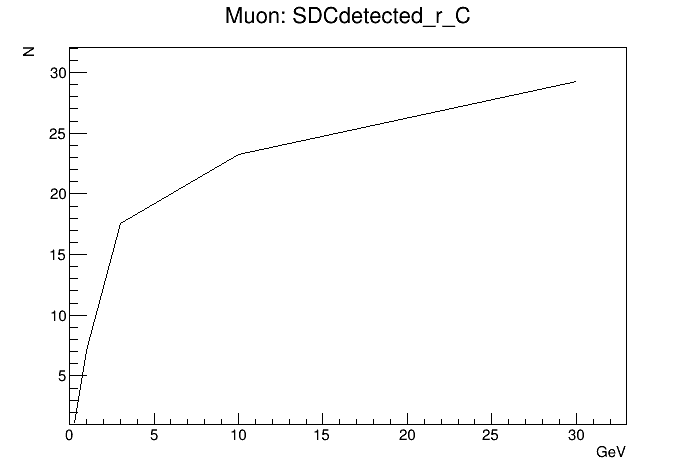

In [17]:
tc=r.TCanvas()
tg.Draw("al")
tc.Draw()